# Insights Extraction


In [1]:
from utils import *
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np


data, labels = extract_data('data/Sentences_50Agree.txt')
norm_data = normalize_corpus(data)
filtered_data = remove_stopwords(norm_data)
filtered_data_no_num = remove_stopwords(normalize_corpus(data, remove_numbers=True))
# change the following line to use other normalized data
positives, neutrals, negatives = get_data_splitted(filtered_data_no_num, labels)


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/syedalimuradtahir/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/syedalimuradtahir/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Number of positive sentences:  1363   28.126289723483282 %
Number of neutral sentences:  2879   59.40982253404869 %
Number of negative sentences:  1967   40.5901774659513 %


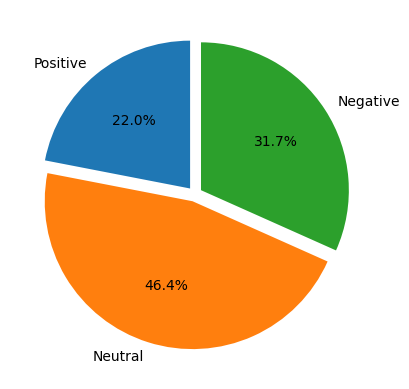

In [2]:
#Distribution of the dataset (Positive vs Neutral vs Negative)
print("Number of positive sentences: ", len(positives), " ", len(positives)/len(data)*100, "%")
print("Number of neutral sentences: ", len(neutrals), " ", len(neutrals)/len(data)*100, "%")
print("Number of negative sentences: ", len(negatives), " ", len(negatives)/len(data)*100, "%")

#Pie Chart of the dataset (Positive vs Neutral vs Negative)
labels = 'Positive', 'Neutral', 'Negative'
sizes = [len(positives), len(neutrals), len(negatives)]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=(0.05, 0.05, 0.05), labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
plt.show()


Average number of words and characters per class: 
Positive Sentences - Avg Number of Words:  13.107850330154072  - Avg Number of Characters :  6.43227359229822
Neutral Sentences - Avg Number of Words:  11.804793331017715  - Avg Number of Characters:  6.690519625728241
Negative Sentences - Avg Number of Words:  12.820030503304524  - Avg Number of Characters:  6.320537732482056 



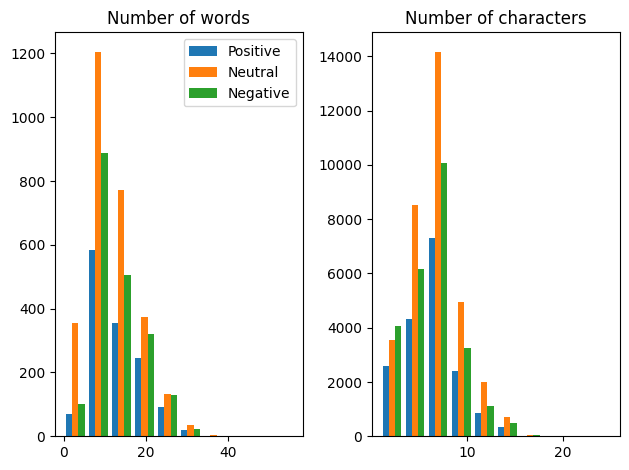

In [3]:
#Average number of words and number of characters per class
n_words_pos = [len(sentence) for sentence in positives]
avg_n_words_pos = sum(n_words_pos)/len(n_words_pos)
n_chars_pos = [len(word) for sentence in positives for word in sentence]
avg_n_chars_pos = sum(n_chars_pos)/len(n_chars_pos)

n_words_neu = [len(sentence) for sentence in neutrals]
avg_n_words_neu = sum(n_words_neu)/len(n_words_neu)
n_chars_neu = [len(word) for sentence in neutrals for word in sentence]
avg_n_chars_neu = sum(n_chars_neu)/len(n_chars_neu)

n_words_neg = [len(sentence) for sentence in negatives]
avg_n_words_neg = sum(n_words_neg)/len(n_words_neg)
n_chars_neg = [len(word) for sentence in negatives for word in sentence]
avg_n_chars_neg = sum(n_chars_neg)/len(n_chars_neg)

print("Average number of words and characters per class: ")
print("Positive Sentences - Avg Number of Words: ", avg_n_words_pos, " - Avg Number of Characters : ", avg_n_chars_pos)
print("Neutral Sentences - Avg Number of Words: ", avg_n_words_neu, " - Avg Number of Characters: ", avg_n_chars_neu)
print("Negative Sentences - Avg Number of Words: ", avg_n_words_neg, " - Avg Number of Characters: ", avg_n_chars_neg, "\n")

#Graph of the average number of words and number of characters per class

fig, axs = plt.subplots(1, 2, tight_layout=True)
axs[0].hist([n_words_pos, n_words_neu, n_words_neg], bins=10, label=['Positive', 'Neutral', 'Negative'])
axs[0].set_title('Number of words')
axs[1].hist([n_chars_pos, n_chars_neu, n_chars_neg], bins=10, label=['Positive', 'Neutral', 'Negative'])
axs[1].set_title('Number of characters')
axs[0].legend()
plt.show()






- Positive sentences have, on average, 24.79 words and 5.14 characters. This suggests that positive sentences tend to be relatively longer in terms of word count compared to the other classes.
- Neutral sentences have, on average, 21.57 words and 5.24 characters. These sentences are shorter compared to positive sentences but have a slightly higher average number of characters.
- Negative sentences have, on average, 25.03 words and 5.09 characters. Similar to positive sentences, negative sentences tend to be longer in terms of word count, while having slightly fewer characters on average.

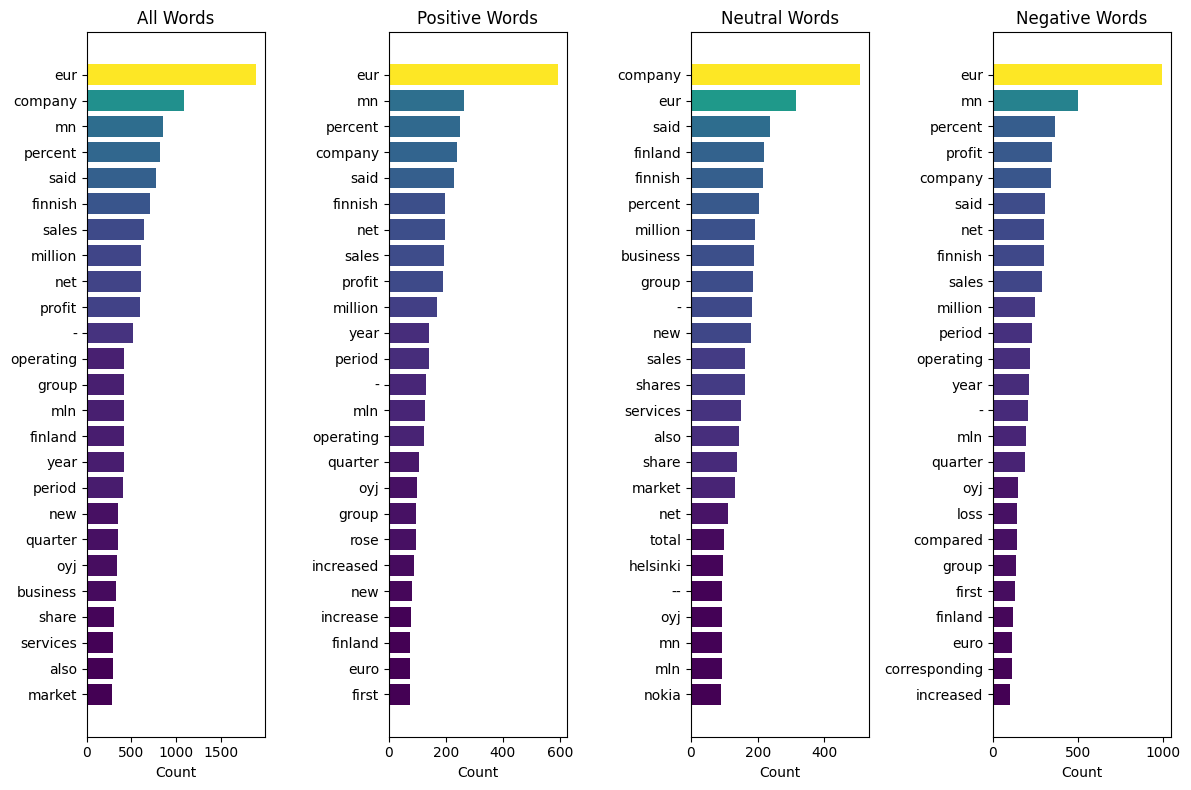

In [4]:
#bar chart frequency of words

def plot_word_frequency(all_words, pos_words, neu_words, neg_words, top=20):
    fig, axes = plt.subplots(1, 4, figsize=(12, 8))
    fig.subplots_adjust(hspace=0.6) 

    categories = ['All Words', 'Positive Words', 'Neutral Words', 'Negative Words']
    data = [all_words, pos_words, neu_words, neg_words]

    for i, ax in enumerate(axes.flatten()):
        word_counts = Counter(data[i])
        labels, values = zip(*word_counts.items())
        sorted_indices = np.argsort(values)[::-1]
        sorted_labels = np.array(labels)[sorted_indices][:top][::-1]  # Sort labels in inverted order
        sorted_values = np.array(values)[sorted_indices][:top][::-1]  # Sort values in inverted order
        color_map = plt.get_cmap('viridis')

        norm_values = (sorted_values - min(sorted_values)) / (max(sorted_values) - min(sorted_values))

        ax.barh(range(len(sorted_labels)), sorted_values, color=color_map(norm_values))
        ax.set_yticks(range(len(sorted_labels)))
        ax.set_yticklabels(sorted_labels)
        ax.set_xlabel('Count')
        ax.set_title(categories[i])

    plt.tight_layout() 
    plt.show()



flattened_list_pos = [item for sublist in positives for item in sublist]
flattened_list_neu = [item for sublist in neutrals for item in sublist]
flattened_list_neg = [item for sublist in negatives for item in sublist]
flattened_list_all = flattened_list_pos + flattened_list_neu + flattened_list_neg
plot_word_frequency(flattened_list_all, flattened_list_pos, flattened_list_neu, flattened_list_neg, top=25)


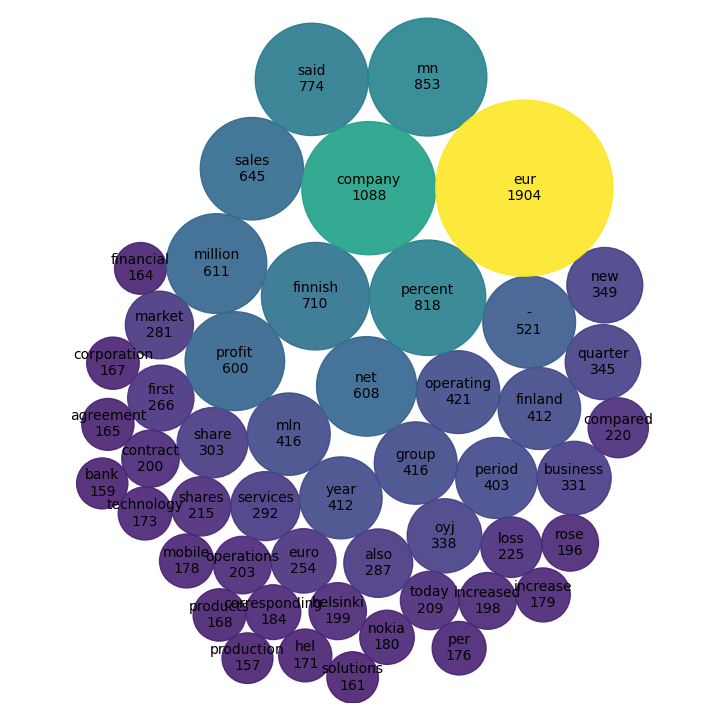

In [5]:
import circlify
import matplotlib.pyplot as plt

def plot_word_frequency_circles(words, top=20):
    # We sort the word counts in descending order
    word_counts = Counter(words)
    sorted_counts = sorted(word_counts.values(), reverse=True)
    sorted_words = sorted(word_counts, key=word_counts.get, reverse=True)

    #Create the circles
    circles = circlify.circlify(sorted_counts[:top], show_enclosure=False, target_enclosure=circlify.Circle(x=0, y=0))
    n = sorted_counts[0]

    # Plot the circles we have created
    fig, ax = plt.subplots(figsize=(9, 9), facecolor='white')
    ax.axis('off')
    lim = max(max(abs(circle.x) + circle.r, abs(circle.y) + circle.r) for circle in circles)
    plt.xlim(-lim, lim)
    plt.ylim(-lim, lim)


    labels = sorted_words[:top]
    counts = sorted_counts[:top]
    labels.reverse()
    counts.reverse()

    color_map = plt.get_cmap('viridis')

    # Plot the circles
    for circle, label, count in zip(circles, labels, counts):
        x, y, r = circle
        color = color_map(count / n)
        ax.add_patch(plt.Circle((x, y), r, alpha=0.9, color=color))
        plt.annotate(label + '\n' + str(count), (x, y), size=10, va='center', ha='center')

    plt.xticks([])
    plt.yticks([])
    plt.show()


plot_word_frequency_circles(flattened_list_all, top=50)
